### Example: Analyzing Citibike Station Activity using Pandas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

We are going to use the database of snapshots of Citibike stations statuses. 

We will first fetch the data from the database.

In [2]:
from sqlalchemy import create_engine

conn_string = 'mysql://{user}:{password}@{host}/?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org', 
    user = 'student',
    password = 'dwdstudent2015',
    encoding = 'utf8mb4')
engine = create_engine(conn_string)

In [3]:
query = '''
SELECT * 
FROM citibike.stations
'''
df = pd.read_sql(query, con=engine)

In [4]:
len(df)

433343

In [5]:
df.head(10)

,id,communication_time,available_bikes,available_docks,total_docks,percent_full
0,72,2017-02-13 00:00:00,13.0000,26.0000,39,0.333300
1,72,2017-02-13 01:00:00,13.0000,26.0000,39,0.333300
2,72,2017-02-13 02:00:00,13.0000,26.0000,39,0.333300
3,72,2017-02-13 03:00:00,13.0000,26.0000,39,0.333300
4,72,2017-02-13 04:00:00,13.0000,26.0000,39,0.333300
5,72,2017-02-13 05:00:00,13.0000,26.0000,39,0.333300
6,72,2017-02-13 06:00:00,12.4667,26.5333,39,0.319647
7,72,2017-02-13 07:00:00,11.8824,27.1176,39,0.304688
8,72,2017-02-13 08:00:00,11.4286,27.5714,39,0.293043
9,72,2017-02-13 09:00:00,15.7727,23.2273,39,0.404436


In [6]:
df.dtypes

id                             int64
communication_time    datetime64[ns]
available_bikes              float64
available_docks              float64
total_docks                    int64
percent_full                 float64
dtype: object

### Exploratory Analysis

As a first step, let's see how the status of the bike stations evolves over time. We compute the average "fullness" of all the bike stations over time. We can use the `groupby` function of pandas, and compute the `mean()` for the groups.

In [7]:
# Notice that this also returns an average for the station ID's which is kind of useless
# We will eliminate these next.
df.groupby('communication_time').mean()

,id,available_bikes,available_docks,total_docks,percent_full
communication_time,,,,,
2017-02-13 00:00:00,1901.245614,10.956287,20.660519,31.574163,0.368884
2017-02-13 01:00:00,1898.854633,11.029498,20.646336,31.659744,0.369463
2017-02-13 02:00:00,1901.054400,11.014188,20.647249,31.649600,0.368175
2017-02-13 03:00:00,1901.054400,11.061084,20.623845,31.673600,0.368799
2017-02-13 04:00:00,1901.054400,11.124468,20.566534,31.683200,0.370133
2017-02-13 05:00:00,1901.054400,11.074584,20.624548,31.692800,0.368350
2017-02-13 06:00:00,1903.177316,10.989437,20.679809,31.654952,0.365719
2017-02-13 07:00:00,1903.533546,10.817218,20.831471,31.619808,0.358422
2017-02-13 08:00:00,1912.195860,10.455136,21.087248,31.469745,0.342012


Now let's plot the activity over time. We can see that the percentage of bikes in the stations falls from 35% overnight to 30% during the morning and evening commute times, while the average availability during the day is around 31%.

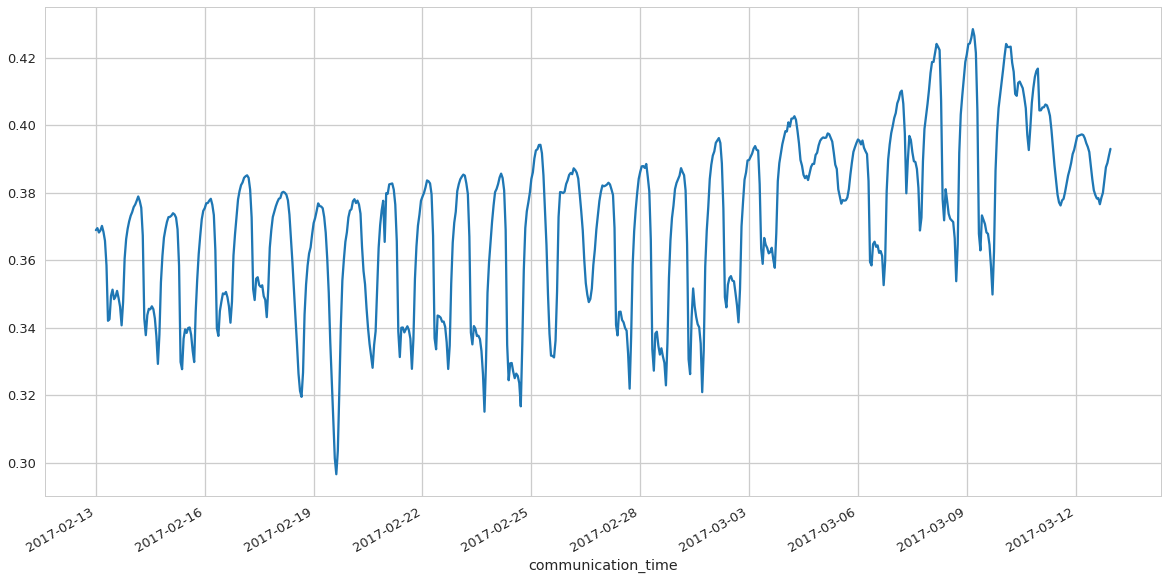

In [8]:
df.groupby('communication_time').mean().percent_full.plot(
    figsize=(20,10), grid=True
)

Let's do also the seasonal decomposition to see the result.

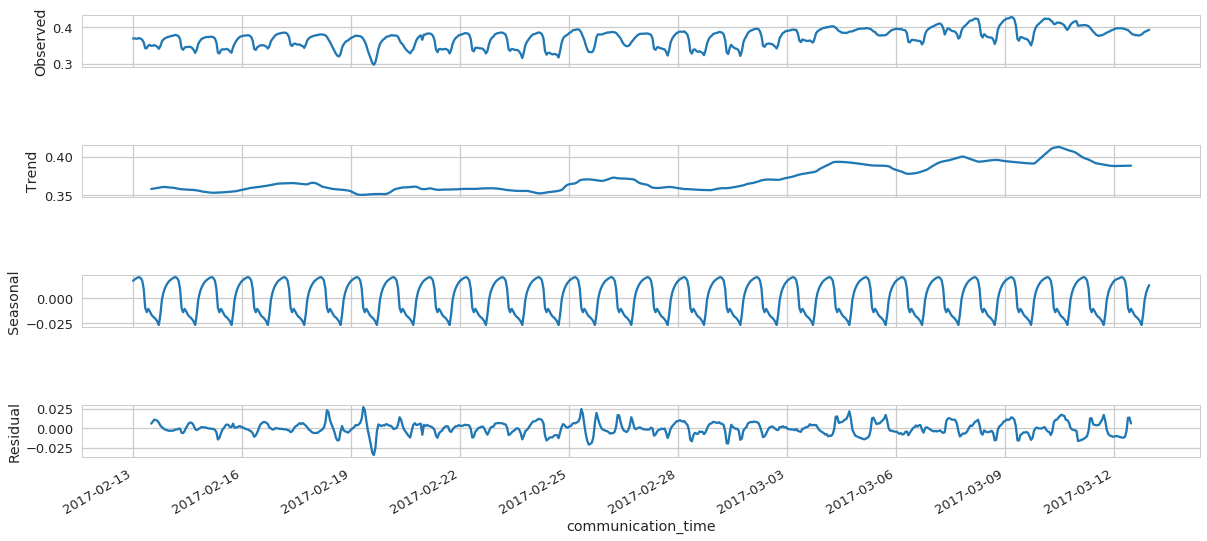

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

time_series = df.groupby('communication_time').mean().percent_full

# We decompose assumming a 24-hour periodicity. 
# There is a weekly component as well, which we ignore.
# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
decomposition = seasonal_decompose(time_series, model='additive', freq=24)

seasonal = decomposition.plot()  
seasonal.set_size_inches(20, 10)

### Examining Time Series per Station

We now create a pivot table, to examine the time series for individual stations.

Notice that we use the `fillna` method, where we fill the cells where we do not have values using the prior, non-missing value.

In [30]:
import numpy as np
df2 = df.pivot_table(
    index='communication_time', 
    columns='id', 
    values='percent_full', 
    aggfunc=np.mean
).interpolate(method='time') 
df2

id,72,79,82,83,116,119,120,127,128,143,...,3438,3440,3443,3445,3447,3449,3452,3453,3454,3455
communication_time,,,,,,,,,,,,,,,,,,,,,
2017-02-13 00:00:00,0.333300,0.010694,0.440000,0.450000,0.219556,0.736800,0.444400,1.000000,0.137900,0.166700,...,0.460174,0.023300,0.000000,0.333300,0.122000,NaN,NaN,NaN,NaN,NaN
2017-02-13 01:00:00,0.333300,0.030300,0.440000,0.450000,0.230800,0.736800,0.444400,0.981269,0.112600,0.166700,...,0.466700,0.023300,0.000000,0.333300,0.122000,NaN,NaN,NaN,NaN,NaN
2017-02-13 02:00:00,0.333300,0.030300,0.440000,0.450000,0.230800,0.736800,0.444400,0.966700,0.103400,0.166700,...,0.465693,0.023300,0.000000,0.333300,0.122000,NaN,NaN,NaN,NaN,NaN
2017-02-13 03:00:00,0.333300,0.030300,0.440000,0.450000,0.230800,0.736800,0.444400,0.966700,0.103400,0.166700,...,0.451600,0.023300,0.000000,0.333300,0.122000,NaN,NaN,NaN,NaN,NaN
2017-02-13 04:00:00,0.333300,0.030300,0.440000,0.450000,0.230800,0.736800,0.444400,0.966700,0.073587,0.166700,...,0.451600,0.023300,0.000000,0.333300,0.122000,NaN,NaN,NaN,NaN,NaN
2017-02-13 05:00:00,0.333300,0.030300,0.440000,0.453131,0.263287,0.736800,0.444400,0.966700,0.042618,0.169141,...,0.437513,0.024847,0.000000,0.333300,0.122000,NaN,NaN,NaN,NaN,NaN
2017-02-13 06:00:00,0.319647,0.024619,0.440000,0.467807,0.291135,0.736800,0.441135,0.958841,0.020294,0.230148,...,0.392800,0.046500,0.025925,0.333300,0.122000,NaN,NaN,NaN,NaN,NaN
2017-02-13 07:00:00,0.304688,0.007129,0.475294,0.497553,0.264983,0.736800,0.350675,0.859244,0.012937,0.354183,...,0.383062,0.046500,0.281508,0.347007,0.137724,NaN,NaN,NaN,NaN,NaN
2017-02-13 08:00:00,0.293043,0.008912,0.475294,0.515894,0.289379,0.798765,0.263000,0.662956,0.236450,0.560768,...,0.293894,0.121759,0.633087,0.329083,0.110518,NaN,NaN,NaN,NaN,NaN


Let's plot the time series for *all* bike stations, for a couple of days in February.

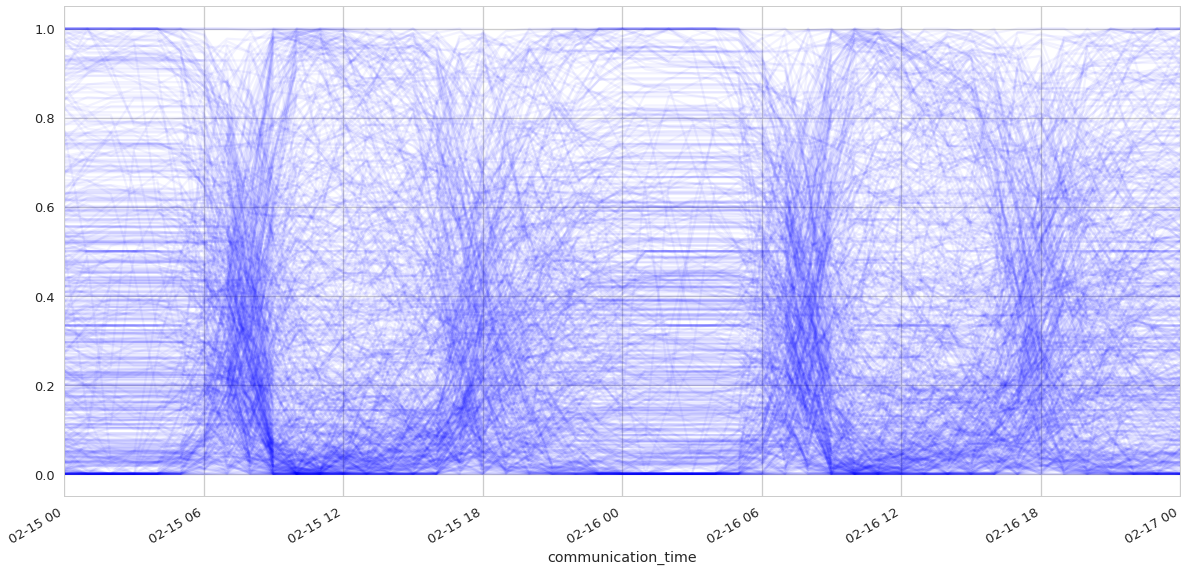

In [31]:
df2.plot(
    alpha=0.05, 
    color='b', 
    legend=False, 
    figsize=(20,10), 
    xlim=('2017-02-15','2017-02-17')
)

Let's limit our plot to just two stations:
* Station 3260 at "Mercer St & Bleecker St"
* Station 161 at "LaGuardia Pl & W 3 St"

which are nearby and tend to exhibit similar behavior. Remember that the list of stations is [available as a JSON](https://feeds.citibikenyc.com/stations/stations.json) 

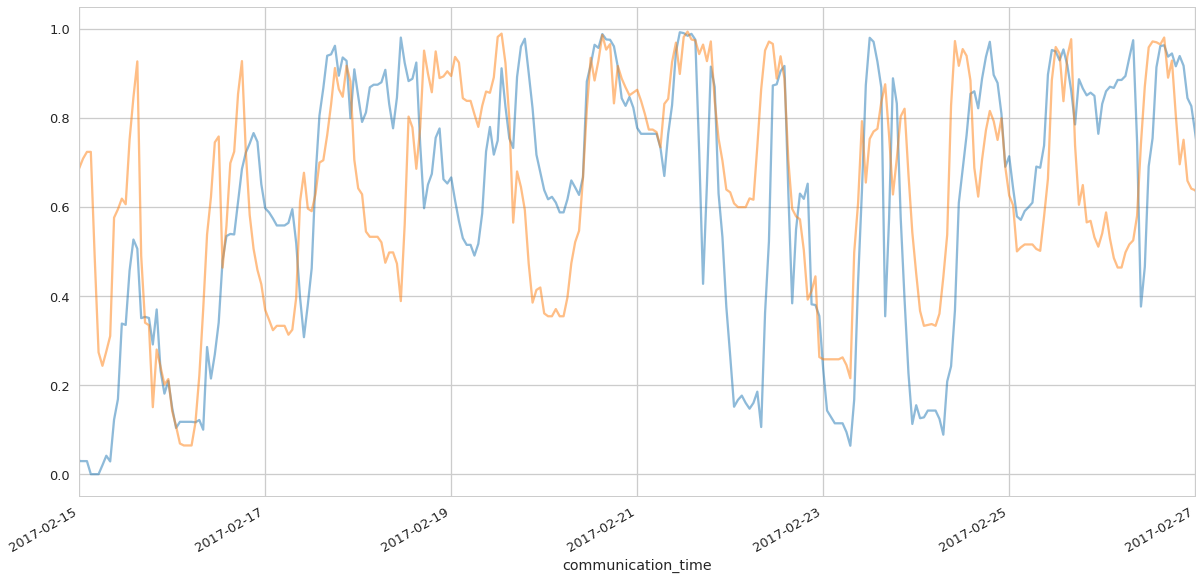

In [33]:
df2[[161, 3260]].plot(
    alpha=0.5,  
    legend=False, 
    figsize=(20,10), 
   xlim=('2017-02-15','2017-02-27')
)

### Finding Bike Stations with Similar Behavior

For our next analysis, we are going to try to find bike stations that have similar behaviors over time. A very simple technique that we can use to find similar time series is to treat the time series as vectors, and compute their correlation. Pandas provides the `corr` function that can be used to calculate the correlation of columns. (If we want to compute the correlation of rows, we can just take the transpose of the dataframe using the `transpose()` function, and compute the correlations there.)

In [34]:
similarities = df2.corr(method='pearson')
similarities

id,72,79,82,83,116,119,120,127,128,143,...,3438,3440,3443,3445,3447,3449,3452,3453,3454,3455
id,,,,,,,,,,,,,,,,,,,,,
72,1.000000,-0.009734,0.012223,0.005283,0.142925,0.039245,0.054251,0.129108,0.199034,0.052493,...,-0.059576,-0.108445,0.040515,0.128389,-0.021751,0.220907,0.150157,0.385665,-0.165113,-0.368392
79,-0.009734,1.000000,-0.246768,0.536225,-0.193042,0.307865,0.017583,-0.226910,0.293365,0.305424,...,-0.010784,0.182329,0.164144,-0.432533,-0.127786,-0.051423,0.098883,0.183053,-0.498407,-0.610691
82,0.012223,-0.246768,1.000000,-0.265721,-0.104862,-0.165140,-0.070519,0.151874,-0.064410,-0.246282,...,0.013997,0.125320,0.071001,-0.049795,0.356456,0.257512,-0.099725,0.031188,-0.249353,-0.327830
83,0.005283,0.536225,-0.265721,1.000000,-0.083330,0.232784,0.169186,-0.007499,0.185422,0.111380,...,-0.131187,0.002872,0.107407,-0.182906,-0.314356,0.063275,0.368954,0.179193,-0.217989,-0.594336
116,0.142925,-0.193042,-0.104862,-0.083330,1.000000,-0.442488,-0.141933,-0.085298,0.329862,0.150556,...,-0.434530,0.141331,0.184780,-0.137808,-0.088354,-0.292073,-0.279795,-0.171223,-0.447509,0.069352
119,0.039245,0.307865,-0.165140,0.232784,-0.442488,1.000000,0.169042,0.069076,-0.144357,0.001480,...,0.545306,-0.257898,-0.199233,0.085460,0.028212,0.041424,0.358347,0.339454,0.354544,0.085313
120,0.054251,0.017583,-0.070519,0.169186,-0.141933,0.169042,1.000000,0.120811,-0.205121,-0.324903,...,0.130718,-0.510063,-0.442057,0.197755,-0.042016,0.515148,0.457940,0.096194,-0.171153,-0.454958
127,0.129108,-0.226910,0.151874,-0.007499,-0.085298,0.069076,0.120811,1.000000,-0.357878,-0.235311,...,0.093995,-0.337788,-0.206758,0.234766,0.055879,-0.106974,0.171176,-0.129788,0.527901,0.136124
128,0.199034,0.293365,-0.064410,0.185422,0.329862,-0.144357,-0.205121,-0.357878,1.000000,0.472066,...,-0.383912,0.389052,0.352936,-0.250072,0.143272,0.031351,-0.143700,0.316442,-0.429077,-0.470342


Let's see the similarities of the two stations that we examined above.

In [35]:
stations = [161, 3260]

similarities[stations].loc[stations]

id,161,3260
id,,
161,1.000000,0.520664
3260,0.520664,1.000000


For bookkeeping purposes, we are going to drop rows that contain NaN values, as we cannot use such similarity values.

In [36]:
similarities.dropna(axis='index', how='any', inplace=True)

We are now going to convert our similarities into distance metrics, that are positive, and bounded to be between 0 and 1.

* If two stations have correlation 1, they behave identically, and therefore have distance 0, 
* If two stations have correlation -1, they have exactly the oppositite behaviors, and therefore we want to have distance 1 (the max) 

In [37]:
distances = ((.5*(1-similarities))**2)
distances

id,72,79,82,83,116,119,120,127,128,143,...,3438,3440,3443,3445,3447,3449,3452,3453,3454,3455
id,,,,,,,,,,,,,,,,,,,,,
72,0.000000,0.254891,0.243926,0.247365,0.183644,0.230762,0.223610,0.189613,0.160387,0.224442,...,0.280675,0.307163,0.230153,0.189926,0.260994,0.151746,0.180558,0.094352,0.339372,0.468124
79,0.254891,0.000000,0.388608,0.053772,0.355838,0.119763,0.241286,0.376327,0.124833,0.120609,...,0.255421,0.167147,0.174664,0.513038,0.317975,0.276372,0.203003,0.166851,0.561306,0.648582
82,0.243926,0.388608,0.000000,0.400512,0.305180,0.339388,0.286503,0.179829,0.283242,0.388305,...,0.243051,0.191266,0.215760,0.275517,0.103537,0.137822,0.302349,0.234649,0.390221,0.440783
83,0.247365,0.053772,0.400512,0.000000,0.293401,0.147155,0.172563,0.253764,0.165884,0.197412,...,0.319896,0.248566,0.199181,0.349817,0.431883,0.219363,0.099555,0.168431,0.370875,0.635477
116,0.183644,0.355838,0.305180,0.293401,0.000000,0.520193,0.326003,0.294468,0.112271,0.180389,...,0.514469,0.184328,0.166146,0.323652,0.296129,0.417363,0.409469,0.342941,0.523821,0.216526
119,0.230762,0.119763,0.339388,0.147155,0.520193,0.000000,0.172623,0.216655,0.327388,0.249260,...,0.051687,0.395577,0.359540,0.209096,0.236093,0.229717,0.102930,0.109080,0.104153,0.209163
120,0.223610,0.241286,0.286503,0.172563,0.326003,0.172623,0.000000,0.193243,0.363079,0.438842,...,0.188913,0.570073,0.519882,0.160899,0.271449,0.058770,0.073457,0.204216,0.342900,0.529226
127,0.189613,0.376327,0.179829,0.253764,0.294468,0.216655,0.193243,0.000000,0.460958,0.381498,...,0.205211,0.447419,0.364066,0.146396,0.222841,0.306348,0.171737,0.319105,0.055719,0.186571
128,0.160387,0.124833,0.283242,0.165884,0.112271,0.327388,0.363079,0.460958,0.000000,0.069679,...,0.478803,0.093314,0.104673,0.390670,0.183496,0.234570,0.327012,0.116813,0.510565,0.540477


### Clustering Based on Distances

Without explaining too much about clustering, we are going to use a clustering technique and cluster together bike stations that are "nearby" according to our similarity analysis. The code is very simple:

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2)
cluster.fit(distances.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

We will now take the results of the clustering and associate each of the data points into a cluster.

In [39]:
labels = pd.DataFrame(list(zip(distances.index.values.tolist(), cluster.labels_)), columns = ["id", "cluster"])
labels.head(10)

,id,cluster
0,72,1
1,79,1
2,82,0
3,83,1
4,116,1
5,119,0
6,120,0
7,127,0
8,128,1
9,143,1


Let's see how many stations in each cluster

In [40]:
labels.groupby('cluster').count()

,id
cluster,
0,397
1,251


### Visualizing the Time Series Clusters

We will start by assining a color to each cluster, so that we can plot each station-timeline with the cluster color. (We put a long list of colors, so that we can play with the number of clusters in the earlier code, and still get nicely colored results.)

In [41]:
colors = list(['r','b', 'g', 'm', 'y', 'k', 'w', 'c'])
labels['color'] = labels['cluster'].apply(lambda cluster_id : colors[cluster_id]) 
labels.head(10)

,id,cluster,color
0,72,1,b
1,79,1,b
2,82,0,r
3,83,1,b
4,116,1,b
5,119,0,r
6,120,0,r
7,127,0,r
8,128,1,b
9,143,1,b


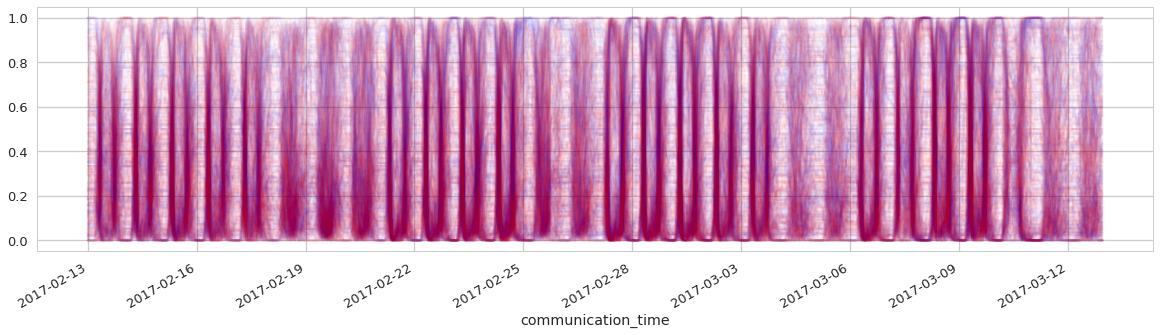

In [44]:
stations_plot = df2.plot(
    alpha=0.02, 
    legend=False, 
    figsize=(20,5), 
    color=labels["color"],
    #xlim=('2017-02-15','2017-02-17')
)

The plot still looks messy. Let's try to plot instead a single line for each cluster. To represent the cluster, we are going to use the _median_ fullness value across all stations that belong to a cluster, for each timestamp. For that, we can again use a pivot table: we define the `timestamp` as one dimension of the table, and `cluster` as the other dimension, and we use the `percentile` function to compute the median. 

For that, we first _join_ our original dataframe with the results of the clustering, using the `merge` command, and add an extra column that includes the clusterid for each station. Then we compute the pivot table.

In [46]:
import numpy as np

median_cluster = df.merge(
    labels, 
    how='inner', 
    on='id'
).pivot_table(
    index='communication_time', 
    columns='cluster', 
    values='percent_full', 
    aggfunc=lambda x: np.percentile(x, 50) # median
)

median_cluster

cluster,0,1
communication_time,,
2017-02-13 00:00:00,0.395300,0.190500
2017-02-13 01:00:00,0.407400,0.186000
2017-02-13 02:00:00,0.407400,0.184700
2017-02-13 03:00:00,0.407400,0.185600
2017-02-13 04:00:00,0.407400,0.185600
2017-02-13 05:00:00,0.407400,0.188850
2017-02-13 06:00:00,0.396394,0.217418
2017-02-13 07:00:00,0.358242,0.255795
2017-02-13 08:00:00,0.296300,0.293043


Now, we can plot the medians for the two clusters.

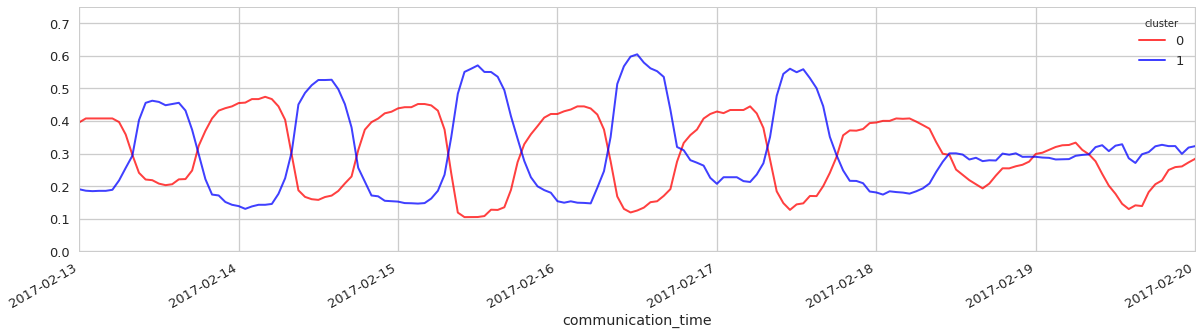

In [51]:
median_plot = median_cluster.plot(
        figsize=(20,5), 
        linewidth = 2, 
        alpha = 0.75,
        color=colors,
        ylim = (0,0.75),
        xlim=('2017-02-13','2017-02-20'),
        grid = True
    )

And just for fun and for visual decoration, let's put the two plots together. We are going to fade a lot the individual station time series (by putting the `alpha=0.01`) and we are going to make more prominent the median lines by increasing their linewidths. We will limit our plot to one week's worth of data:

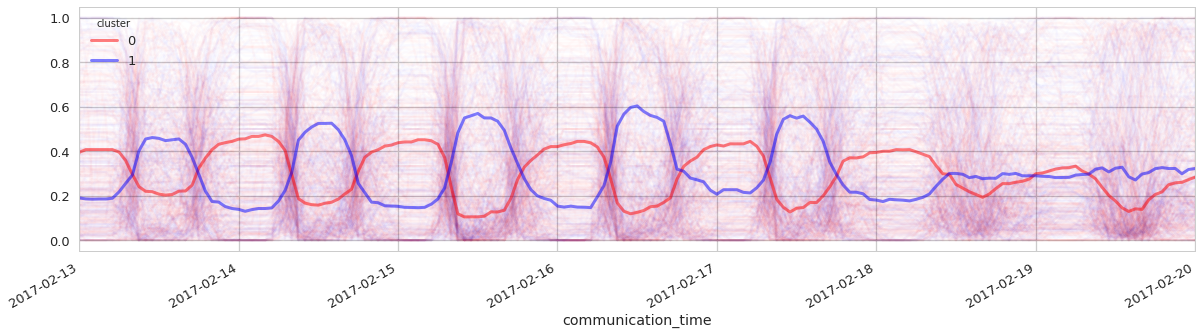

In [50]:
stations_plot = df2.plot(
    alpha=0.01, 
    legend=False, 
    figsize=(20,5), 
    color=labels["color"]
)

median_cluster.plot(
    figsize=(20,5), 
    linewidth = 3, 
    alpha = 0.5,
    color=colors, 
    xlim=('2017-02-13','2017-02-20'),
    ax = stations_plot
)